In [1]:
#Load Required Library
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("wine-1.xls",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
col_name=['cultivator','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids',
          'Nonflavanoid_phenol','Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']
data.columns=col_name
data

,cultivator,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenol,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 1.	Load the data (wine.xls) file 
a)	Refer to this link, https://archive.ics.uci.edu/ml/datasets/wine and read the description of the dataset and attach suitable headers.

In [4]:
#Check data info and dimension
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cultivator                    178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenol           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [5]:
data.shape

(178, 14)

In [6]:
data.isnull().sum()

cultivator                      0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenol             0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

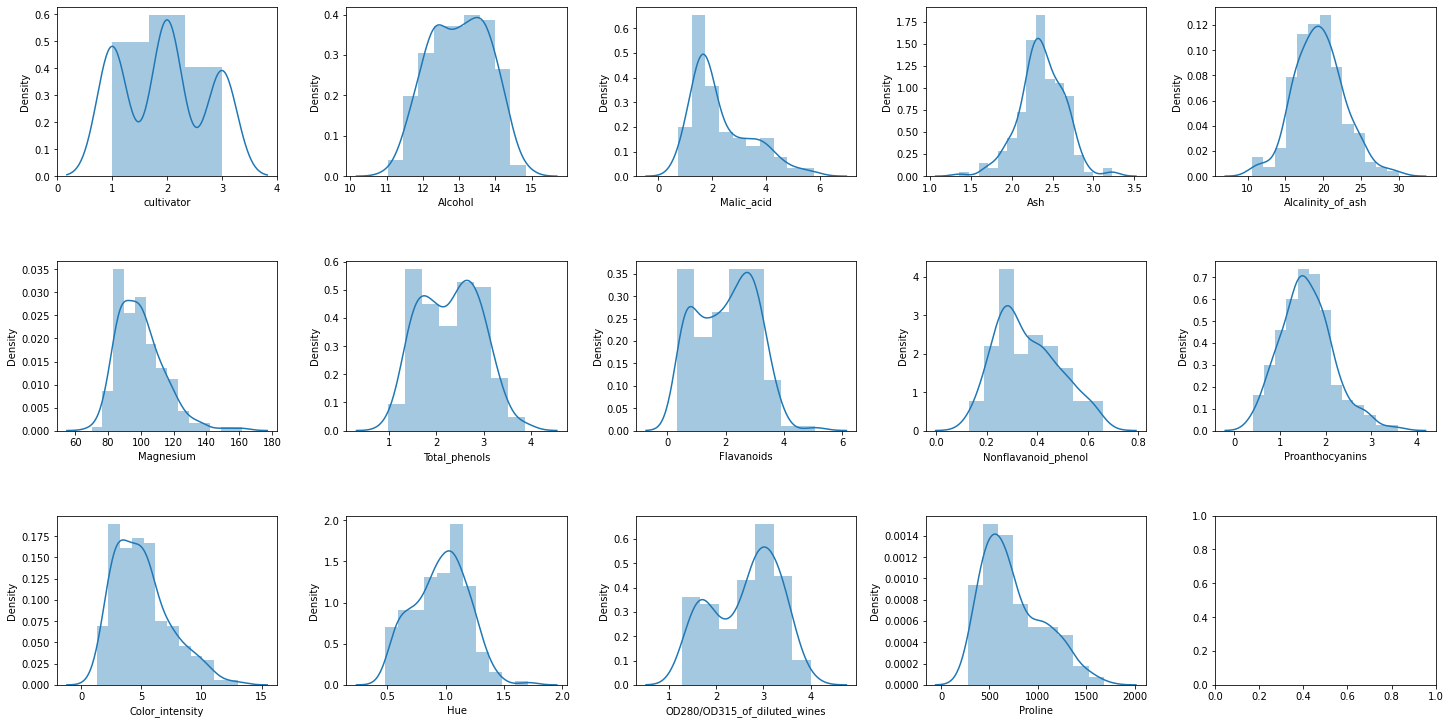

In [7]:
# Distribution plots of all features in the dataset
#data.hist(bins=25,figsize=(10,10))
#plt.show()
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

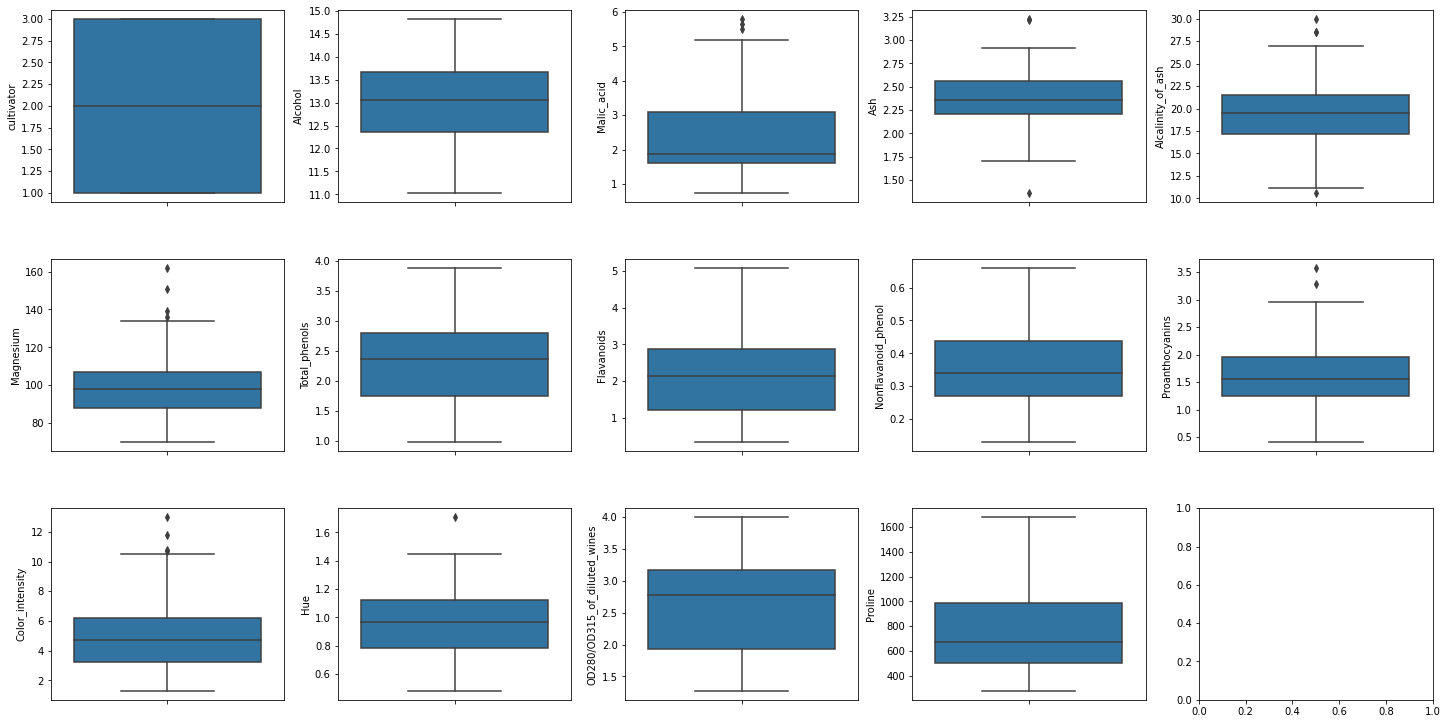

In [8]:
#Check distribution
# create box plots
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

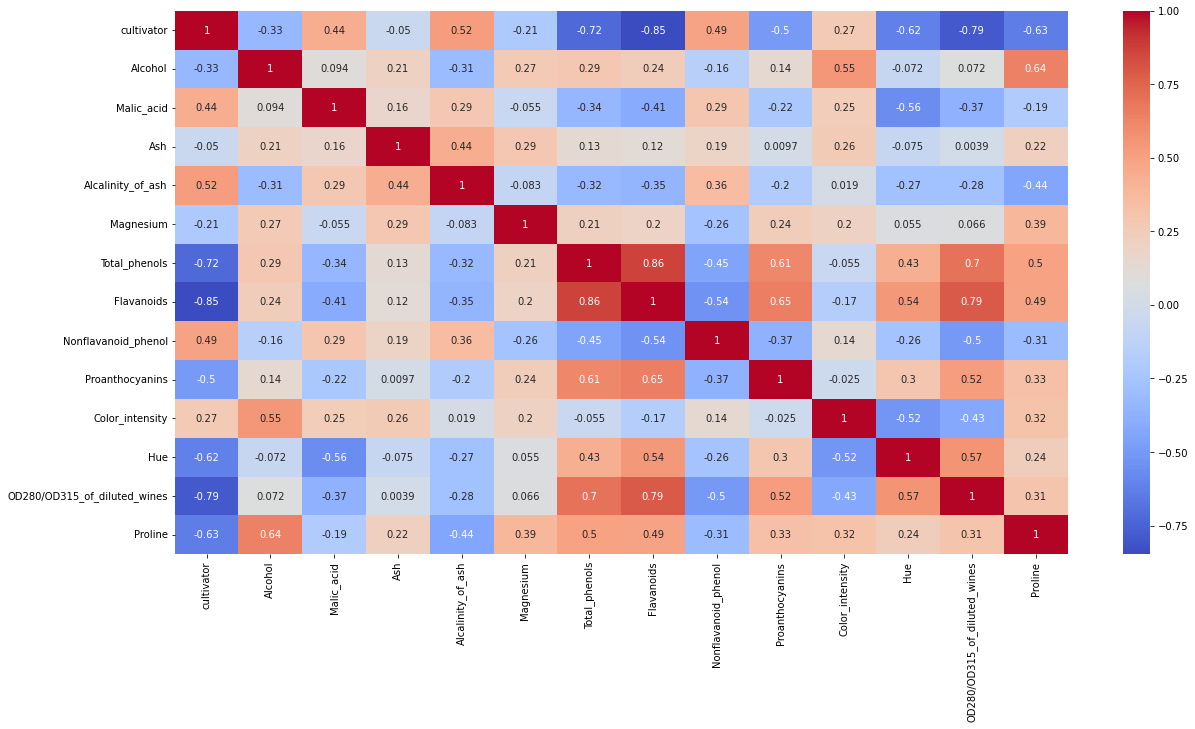

In [9]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### b)	Remove the first column (cultivator) and perform KMeans with (K=3) and show the 3D cluster plot with the most appropriate attributes in X,Y and Z –axis. 

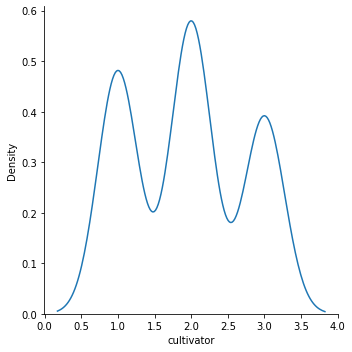

In [10]:
#Check cultivator variable distribution
sns.displot(data,x='cultivator',kind='kde')

In [11]:
# Removing the first column cultivator
df=data.drop(['cultivator'],axis=1)

In [12]:
df

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenol,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
#Keep cultivator as seprate file
cultivator=data.iloc[:,0]
cultivator

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: cultivator, Length: 178, dtype: int64

In [14]:
cultivator=pd.DataFrame(data,columns=['cultivator'])
cultivator

,cultivator
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [15]:
#Check the new data dimension
cultivator.shape

(178, 1)

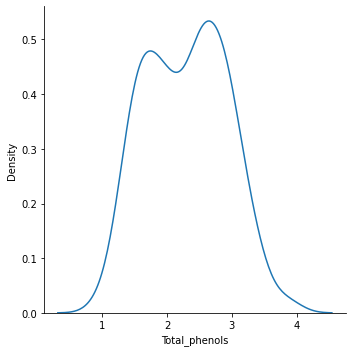

In [16]:
#Total_phenols needs to be watched. Add more insights
sns.displot(df,x='Total_phenols',kind='kde')

<AxesSubplot:xlabel='Total_phenols'>

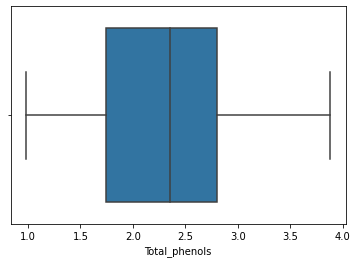

In [17]:
sns.boxplot(df['Total_phenols'])

array([[<AxesSubplot:title={'center':'Total_phenols'}>]], dtype=object)

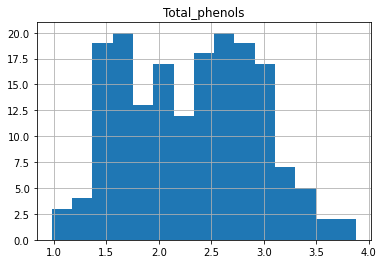

In [18]:
df.hist('Total_phenols',bins=15)

In [19]:
###Scale the data points before doing K means( Required)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [20]:
# check the data points

df_scaled = pd.DataFrame(df_scaled, columns=col_name[1:])
df_scaled

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenol,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [21]:
df_scaled.shape

(178, 13)

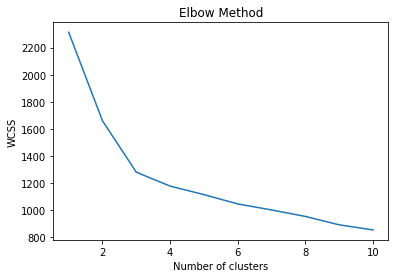

In [22]:
#Buils required K Means cluster
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
#Fit it on our data
cluster_Kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
model_kmeans = cluster_Kmeans.fit(df_scaled)
kmeans_pred = model_kmeans.labels_
kmeans_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [24]:
# Number of observations per cluster
print(len(df_scaled[kmeans_pred == 0].index))
print(len(df_scaled[kmeans_pred == 1].index))
print(len(df_scaled[kmeans_pred == 2].index))

51
66
61


In [25]:
# Check Centroid values for each cluster and store it in new data frame
print(f" Centroid Value of 1st Cluster= {51/3} ")
print(f" Centroid Value of 2nd Cluster= {66/3} ")
print(f" Centroid Value of 3rd Cluster= {61/3} ")

 Centroid Value of 1st Cluster= 17.0 
 Centroid Value of 2nd Cluster= 22.0 
 Centroid Value of 3rd Cluster= 20.333333333333332 


#### Silhouette score

The range of Silhouette score is [-1, 1]. Its analysis is as follows −

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

In [26]:
from sklearn import metrics

print('silhouette score of kmeans clustering = ',metrics.silhouette_score(df_scaled, model_kmeans.labels_))

silhouette score of kmeans clustering =  0.28594199657074876


#### Davis-Bouldin Index

Davis-Bouldin Index
DB index is another good metric to perform the analysis of clustering algorithms. 
With the help of DB index, we can understand the following points about clustering model −
1. Weather the clusters are well-spaced from each other or not?
2. How much dense the clusters are?

Less the DB index, better the clustering model is.

In [27]:
from sklearn import metrics
print('DB index of kmeans clustering =',metrics.davies_bouldin_score(df_scaled,model_kmeans.labels_))

DB index of kmeans clustering = 1.391793832317738


In [28]:
#create a new dataframe for labels and converting it
kmeans_labels=pd.DataFrame(model_kmeans.labels_)
#print(kmeans.labels_)
kmeans_labels

,0
0,2
1,2
2,2
3,2
4,2
...,...
173,0
174,0
175,0
176,0


In [29]:
# Join the label dataframe with the raw data frame
df_scaled['kMeans_labels']=kmeans_labels
df_scaled

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenol,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,kMeans_labels
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,0
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,0


#### KMeans Clustering for 3D scatter Plot

In [30]:
# creating a two dimentional matrix 
x = pd.DataFrame(df_scaled.iloc[:,[5,6,11]].values)
x

,0,1,2
0,0.808997,1.034819,1.847920
1,0.568648,0.733629,1.113449
2,0.808997,1.215533,0.788587
3,2.491446,1.466525,1.184071
4,0.808997,0.663351,0.449601
...,...,...,...
173,-0.985614,-1.424900,-1.231206
174,-0.793334,-1.284344,-1.485445
175,-1.129824,-1.344582,-1.485445
176,-1.033684,-1.354622,-1.400699


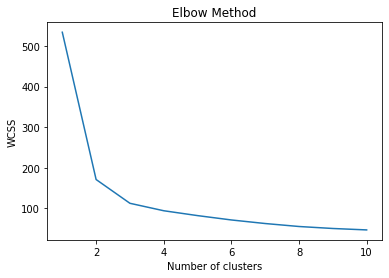

In [31]:
#Buils required K Means cluster
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
#Fit it on our data
cluster_Kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
model_kmeans = cluster_Kmeans.fit(x)
y_pred = model_kmeans.labels_
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [33]:
# Number of observations per cluster
print(len(x[y_pred == 0].index))
print(len(x[y_pred == 1].index))
print(len(x[y_pred == 2].index))

48
68
62


In [34]:
#print(df_scaled[y_pred == 0].index)
#print(df[y_pred == 0,1][1])
#print(df[y_pred == 0,2][1])

In [35]:
# Check Centroid values for each cluster and store it in new data frame
print(f" Centroid Value of 1st Cluster= {48/3} ")
print(f" Centroid Value of 2nd Cluster= {68/3} ")
print(f" Centroid Value of 3rd Cluster= {62/3} ")

 Centroid Value of 1st Cluster= 16.0 
 Centroid Value of 2nd Cluster= 22.666666666666668 
 Centroid Value of 3rd Cluster= 20.666666666666668 


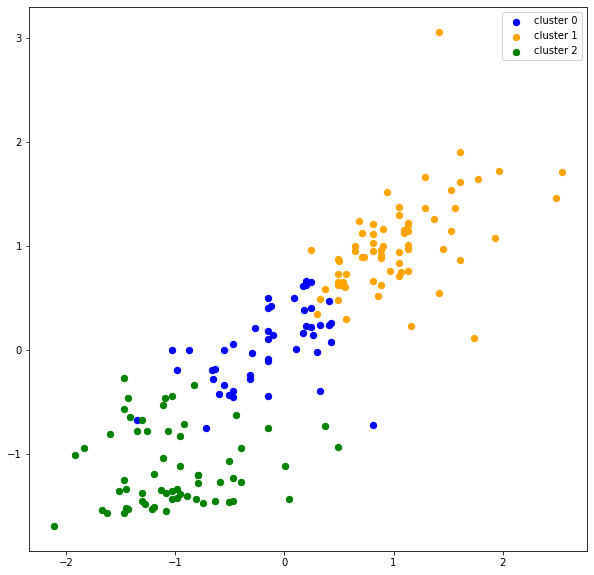

In [36]:
#2D scatterplot using matplotlib
x = np.array(x)
fig = plt.figure(figsize = (10,10))
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,1], s = 40 , color = 'blue', label = "cluster 0")
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,1], s = 40 , color = 'orange', label = "cluster 1")
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,1], s = 40 , color = 'green', label = "cluster 2")
plt.legend()
plt.show()

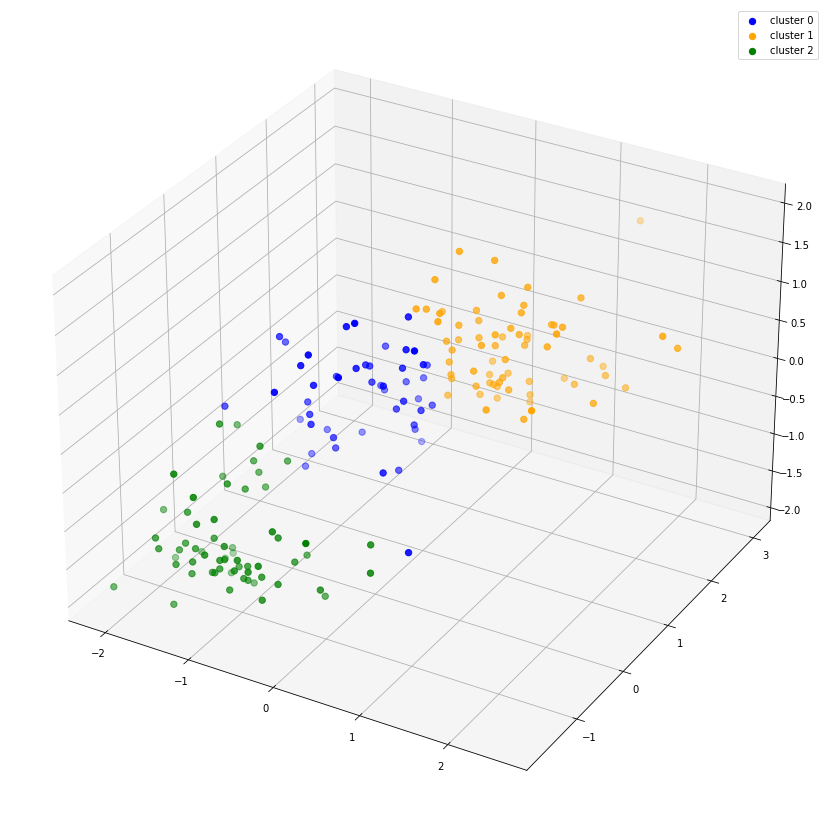

In [37]:
#3D Scatter Plot of the Clusters formed
#3D scatterplot using matplotlib

x = np.array(x)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_pred == 0,0],x[y_pred == 0,1],x[y_pred == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_pred == 1,0],x[y_pred == 1,1],x[y_pred == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_pred == 2,0],x[y_pred == 2,1],x[y_pred == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.legend()
plt.show()

In [38]:
#Use Cophenet index to find best linkage method

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering,it represents the tightness of the clusters 

In [39]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Hierarchical Agglomerative Clustering
Z1 = shc.linkage(df_scaled, method='ward')
Z2 = shc.linkage(df_scaled, method='average')
Z3 = shc.linkage(df_scaled, method='complete')
Z4 = shc.linkage(df_scaled, method='single')

# Cophenetic Distances, for each linkage
c1, coph_dists = shc.cophenet(Z1, pdist(df_scaled, metric='euclidean'))
c2, coph_dists = shc.cophenet(Z2, pdist(df_scaled, metric='euclidean'))
c3, coph_dists = shc.cophenet(Z3, pdist(df_scaled, metric='euclidean'))
c4, coph_dists = shc.cophenet(Z4, pdist(df_scaled, metric='euclidean'))

In [40]:
print('Cophenetic correlation coefficient for ward linkage (the closer to 1, the better): {:.4f}'.format(c1))
print('Cophenetic correlation coefficient for average linkage (the closer to 1, the better) :{:.4f}'.format(c2))
print('Cophenetic correlation coefficient for complete linkage (the closer to 1, the better) :{:.4f}'.format(c3))
print('Cophenetic correlation coefficient for single linkage (the closer to 1, the better): {:.4f}'.format(c4))

Cophenetic correlation coefficient for ward linkage (the closer to 1, the better): 0.6938
Cophenetic correlation coefficient for average linkage (the closer to 1, the better) :0.7760
Cophenetic correlation coefficient for complete linkage (the closer to 1, the better) :0.6367
Cophenetic correlation coefficient for single linkage (the closer to 1, the better): 0.6070


From the above values of Cophenetic correlation coefficient for vaious linkages method 
we can see that average linkage method is best suited for this dataset. 
So we used the Average linkage method to plot the dendogram.

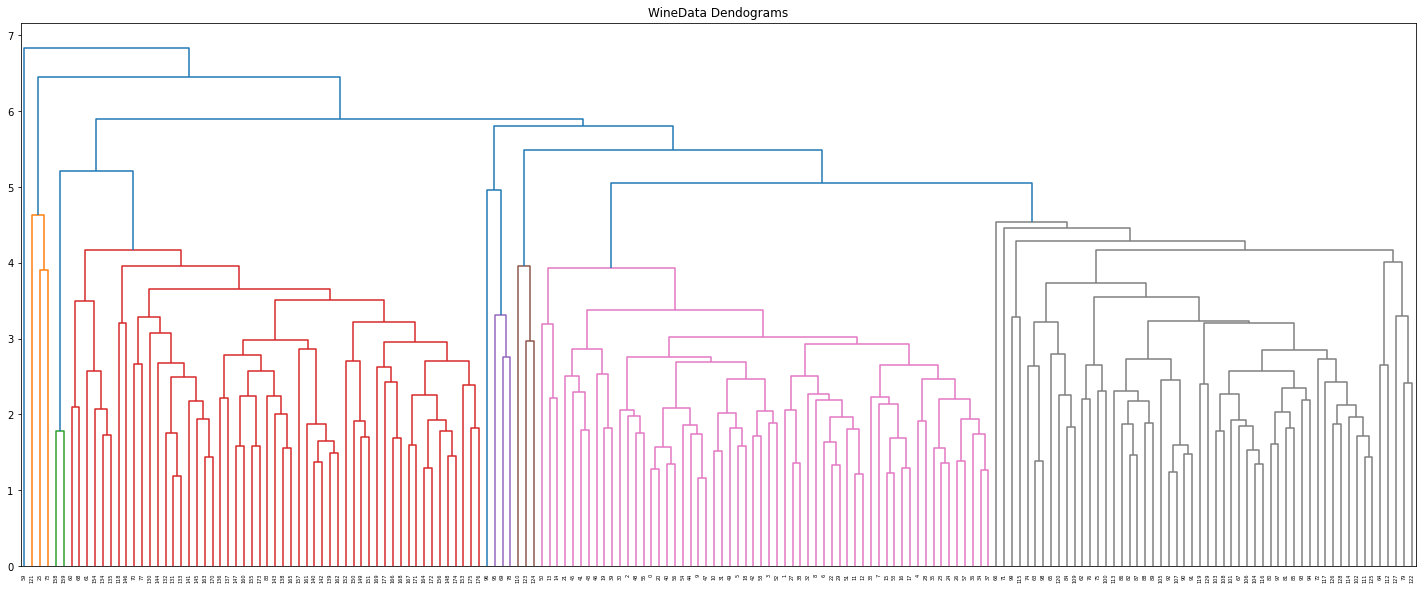

In [41]:
#Plot dendogram
plt.figure(figsize=(25, 10))
plt.title("WineData Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='average'))

In [42]:
#build the model using average/ward/complete method
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')


In [43]:
#Train it
model_clt = cluster.fit(df_scaled)
model_clt

AgglomerativeClustering(linkage='average', n_clusters=3)

In [44]:
model_clt.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [45]:
from sklearn import metrics

print('silhouette score of Hierarchical clustering = ',metrics.silhouette_score(df_scaled, model_clt.labels_))

silhouette score of Hierarchical clustering =  0.14687541520017544


In [46]:
from sklearn import metrics
print('DB index of Hierarchical clustering =',metrics.davies_bouldin_score(df_scaled,model_clt.labels_))

DB index of Hierarchical clustering = 1.0464197131041164


In [47]:
#plt.figure(figsize=(10, 7))
#plt.scatter(df_scaled[:,0], df_scaled[:,1],s=50,c=cluster.labels_, cmap='rainbow')

* Comment on the results obtained using KMeans and  Hierarchical Clustering, which clustering method best suited for this dataset.

In [48]:
# Results for kmeans clustering
print('silhouette score of kmeans clustering = ',metrics.silhouette_score(df_scaled, model_kmeans.labels_))
print("\n--------------------------------------\n")
print('DB index of kmeans clustering =',metrics.davies_bouldin_score(df_scaled,model_kmeans.labels_))
print("\n--------------------------------------\n")

# Results for Hierarchical clustering
print('silhouette score of Hierarchical clustering = ',metrics.silhouette_score(df_scaled, model_clt.labels_))
print("\n--------------------------------------\n")
print('DB index of Hierarchical clustering =',metrics.davies_bouldin_score(df_scaled,model_clt.labels_))


silhouette score of kmeans clustering =  0.19483077707924099

--------------------------------------

DB index of kmeans clustering = 1.8078078258782593

--------------------------------------

silhouette score of Hierarchical clustering =  0.14687541520017544

--------------------------------------

DB index of Hierarchical clustering = 1.0464197131041164


I used two methods to know which clustering method best suited for this dataset.

1.silhouette score - value near to +1 is best score for the dataset 

2.DB index - Less the DB index, better the clustering model is. 

From above results we see that the if we used silhouette score results K-means clustering method is best suited for this dataset and if we used DB index results Hierarchical clustering method is best suited for this dataset.

* e)	Apply PCA technique on the 13 independent variables and reduce the dimensions to (top-7) PC dimensions based on Eigen Values and reduce the original dataset to 178 x 7 dimension and fit a Logistic Regression model for (70%) of records and validate on (30%) of the records with precision and recall values.

In [49]:
# Standardize feature to have mean 0 and variance 1
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(df))
X_std

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [50]:
X_std.shape

(178, 13)

In [51]:
# Obtain covariance matrix for X_std
cov_matrix = np.cov(X_std,bias=False) 
print('Covariance Matrix:\n',cov_matrix)

Covariance Matrix:
 [[ 0.94194263  0.70581209  0.36507951 ... -0.32366933 -0.25191907
  -0.77261093]
 [ 0.70581209  0.94151839  0.29116368 ... -0.44362127 -0.45417883
  -0.87574038]
 [ 0.36507951  0.29116368  0.5512209  ... -0.4042183  -0.34622848
  -0.50608494]
 ...
 [-0.32366933 -0.44362127 -0.4042183  ...  1.56168742  1.25946005
   1.17306376]
 [-0.25191907 -0.45417883 -0.34622848 ...  1.25946005  1.23413659
   1.03659322]
 [-0.77261093 -0.87574038 -0.50608494 ...  1.17306376  1.03659322
   1.68537124]]


In [52]:
#Calculate eigenvalues and eigenvectors 
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(cov_matrix)

In [53]:
eigenvalues

array([ 6.21326656e+01+0.00000000e+00j,  2.99793607e+01+0.00000000e+00j,
        1.44627573e+01+0.00000000e+00j,  1.35689219e+01+0.00000000e+00j,
        1.07892972e+01+0.00000000e+00j,  9.51736495e+00+0.00000000e+00j,
        5.88915476e+00+0.00000000e+00j,  4.73555260e+00+0.00000000e+00j,
        3.84886659e+00+0.00000000e+00j,  3.61174034e+00+0.00000000e+00j,
        2.84279286e+00+0.00000000e+00j,  1.55028633e+00+0.00000000e+00j,
        2.46745613e-15+1.77884190e-15j,  2.46745613e-15-1.77884190e-15j,
        2.83081476e-15+4.06112547e-16j,  2.83081476e-15-4.06112547e-16j,
        6.83931037e-16+2.58814039e-15j,  6.83931037e-16-2.58814039e-15j,
       -2.65249522e-15+8.43516771e-16j, -2.65249522e-15-8.43516771e-16j,
       -2.20175497e-15+1.58987361e-15j, -2.20175497e-15-1.58987361e-15j,
       -1.64001508e-15+2.13557574e-15j, -1.64001508e-15-2.13557574e-15j,
       -9.73800491e-16+2.33833113e-15j, -9.73800491e-16-2.33833113e-15j,
       -3.94781661e-16+2.43558030e-15j, -3.94781661

In [54]:
eigenvectors

array([[-9.12356191e-02+0.j        , -7.93689970e-02+0.j        ,
        -4.69675243e-02+0.j        , ..., -2.43364992e-02+0.01893696j,
        -2.43364992e-02-0.01893696j,  6.18589645e-02+0.j        ],
       [-9.36117648e-02+0.j        , -6.58389977e-02+0.j        ,
         6.78663387e-02+0.j        , ...,  8.88636724e-03-0.00130081j,
         8.88636724e-03+0.00130081j,  8.38412826e-05+0.j        ],
       [-6.20073756e-02+0.j        , -2.17566496e-02+0.j        ,
        -2.42779156e-02+0.j        , ..., -4.13128821e-03+0.00214204j,
        -4.13128821e-03-0.00214204j,  2.43996808e-02+0.j        ],
       ...,
       [ 1.18309447e-01+0.j        , -1.21358951e-01+0.j        ,
        -2.00821376e-02+0.j        , ..., -7.67335411e-02+0.03173481j,
        -7.67335411e-02-0.03173481j,  9.49841611e-02+0.j        ],
       [ 1.03936175e-01+0.j        , -9.55875516e-02+0.j        ,
        -4.13497491e-02+0.j        , ..., -2.59261195e-03-0.00811203j,
        -2.59261195e-03+0.00811203j

In [55]:
eigenvectors[:,i]

array([ 0.10351104+0.j,  0.10360365+0.j,  0.03074788+0.j, -0.09548405+0.j,
       -0.01721973+0.j, -0.09377756+0.j,  0.07217094+0.j,  0.03735347+0.j,
       -0.07463272+0.j,  0.08808598+0.j, -0.08746622+0.j, -0.0174641 +0.j,
       -0.0041475 +0.j, -0.05602865+0.j, -0.01125664+0.j,  0.05292205+0.j,
       -0.10121401+0.j, -0.0900713 +0.j, -0.06106503+0.j,  0.11117969+0.j,
        0.07518002+0.j,  0.14940897+0.j,  0.08732373+0.j,  0.10763394+0.j,
        0.07784076+0.j, -0.00840799+0.j,  0.01058993+0.j, -0.08998553+0.j,
        0.01452219+0.j,  0.03294025+0.j, -0.13854674+0.j, -0.07130858+0.j,
       -0.03575704+0.j, -0.06999058+0.j, -0.00964211+0.j,  0.01723953+0.j,
        0.07607242+0.j, -0.03958365+0.j, -0.03444622+0.j,  0.09229893+0.j,
        0.03440547+0.j, -0.07031255+0.j,  0.03632337+0.j, -0.00970228+0.j,
       -0.01586372+0.j, -0.05807736+0.j, -0.07103759+0.j, -0.01803573+0.j,
       -0.06491679+0.j,  0.04855334+0.j,  0.10784175+0.j,  0.09682702+0.j,
       -0.04703793+0.j, -

In [56]:
# Make pair of eigenvalue, eigenvector
#LHS
cov_matrix.dot(eigenvectors[:,0])
# RHS
eigenvalues[0]*eigenvectors[:,0]

array([-5.66871221+0.j, -5.81634848+0.j, -3.85268353+0.j, -5.65596593+0.j,
       -0.46377826+0.j, -4.75967702+0.j, -4.48793135+0.j, -2.87791222+0.j,
       -5.12867013+0.j, -5.52320806+0.j, -6.0454786 +0.j, -3.67070383+0.j,
       -4.14590426+0.j, -6.31714137+0.j, -7.48899042+0.j, -3.25812463+0.j,
       -2.22556269+0.j, -2.10859563+0.j, -5.23174991+0.j, -3.74188377+0.j,
       -5.91303497+0.j, -1.56738511+0.j, -5.33888758+0.j, -3.8790963 +0.j,
       -3.48327192+0.j,  0.49256003+0.j, -3.30204443+0.j, -3.32978851+0.j,
       -3.14654975+0.j, -4.92603842+0.j, -3.47512668+0.j, -4.49633596+0.j,
       -3.06952624+0.j, -1.76379414+0.j, -2.28628245+0.j, -3.5575813 +0.j,
       -2.38985278+0.j, -2.4312833 +0.j, -4.366734  +0.j, -3.96766695+0.j,
       -4.66278712+0.j, -1.39943617+0.j, -5.89399954+0.j, -0.67400361+0.j,
       -4.70244115+0.j, -0.73068554+0.j, -4.55851463+0.j, -5.86732481+0.j,
       -3.00220447+0.j, -4.15885984+0.j, -7.34965013+0.j, -5.26475054+0.j,
       -6.08993888+0.j, -

In [57]:
print(np.allclose(cov_matrix.dot(eigenvectors[:, 0]),eigenvalues[0]*eigenvectors[:, 0]))

True


In [58]:
# Determine explained variance
total_egnvalues = sum(eigenvalues)
var_exp = [(i/total_egnvalues) for i in sorted(eigenvalues, reverse=True)]
var_exp

[(0.38134866534769635+0j),
 (0.1840028766674229+0j),
 (0.08876736806645287+0j),
 (0.08328131731725094+0j),
 (0.06622094899509783+0j),
 (0.05841427190483336+0j),
 (0.0361455811892935+0j),
 (0.02906517283708506+0j),
 (0.023623002885268737+0j),
 (0.022167604521307012+0j),
 (0.01744807265269239+0j),
 (0.009515117615598867+0j),
 (1.7374555243841795e-17+2.492577393057466e-18j),
 (1.7374555243841795e-17-2.492577393057466e-18j),
 (1.514438651599124e-17+1.0917912153183602e-17j),
 (1.514438651599124e-17-1.0917912153183602e-17j),
 (1.2492161161842122e-17+0j),
 (1.0134537147969572e-17+1.6180349508078142e-18j),
 (1.0134537147969572e-17-1.6180349508078142e-18j),
 (9.958015435874232e-18+8.910591837761535e-18j),
 (9.958015435874232e-18-8.910591837761535e-18j),
 (9.058844370371127e-18+6.624855962641435e-19j),
 (9.058844370371127e-18-6.624855962641435e-19j),
 (8.9267560478604e-18+1.8501872993918563e-18j),
 (8.9267560478604e-18-1.8501872993918563e-18j),
 (7.681482941836901e-18+3.581874454319098e-18j),
 (

In [59]:
X_std.shape

(178, 13)

In [60]:
df_scaled.shape

(178, 14)

In [61]:
cultivator.shape

(178, 1)

In [62]:
target = cultivator
df = df_scaled

In [63]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 0)

In [64]:
X_train.shape

(124, 14)

In [65]:
X_test.shape

(54, 14)

In [66]:
y_train.shape

(124, 1)

In [67]:
y_test.shape

(54, 1)

In [68]:
#-----------------Build_classifier_model_using_all_available_variables------
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression(random_state = 0)
model.fit(X_train,y_train)
model

LogisticRegression(random_state=0)

In [69]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = model.predict(X_test)

In [70]:
#--------Check_model_performance-------------------
from sklearn.metrics import classification_report
print("The classification_report is:{}".format(classification_report(y_test,model.predict(X_test))))

The classification_report is:              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [71]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Logistic Regression model accuracy(in %):", 
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 100.0


In [72]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 13]], dtype=int64)

* Compare the above (e) results with fitting a Logistic Regression model for the original dataset (178 x 13) without applying PCA.  [with 70% & 30% split]

#### Applying PCA on Logistic Regression model 

In [73]:
# Keep the first 7 principal components 
# P_reduce is 13 x 7 matrix

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
tr_comp = pca.fit_transform(X_train)
ts_comp = pca.transform(X_test)

In [75]:
tr_comp.shape

(124, 7)

In [76]:
ts_comp.shape

(54, 7)

In [77]:
#---------------Build_ml_model_on_extracted_components---------------
from sklearn.linear_model import LogisticRegression
pc_model = LogisticRegression(random_state=0)
pc_model.fit(tr_comp,y_train)
pc_model

LogisticRegression(random_state=0)

In [78]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred_pca = pc_model.predict(ts_comp)

In [79]:
#------------Evaluate_model_performance---------------
from sklearn.metrics import classification_report
print("The classification report is: {}".format(classification_report(y_test,pc_model.predict(ts_comp))))

The classification report is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [80]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Logistic Regression model accuracy(in %): ", metrics.accuracy_score(y_test, y_pred_pca)*100)

Logistic Regression model accuracy(in %):  100.0


In [81]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred_pca)
cm

array([[19,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 13]], dtype=int64)